# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [4]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [5]:
train, test = keras.datasets.cifar10.load_data()

In [6]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [7]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp():
    """
    Build your own model
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [10]:
## 超參數設定
"""
Set your required experiment parameters
"""
EPOCHS = 50
BATCH_SIZE = 256

model = build_mlp()
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.9578 - accuracy: 0.2942 - val_loss: 1.7553 - val_accuracy: 0.3645
Epoch 2/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.7145 - accuracy: 0.3842 - val_loss: 1.7018 - val_accuracy: 0.3931
Epoch 3/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.6190 - accuracy: 0.4224 - val_loss: 1.5676 - val_accuracy: 0.4378
Epoch 4/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.5559 - accuracy: 0.4466 - val_loss: 1.5604 - val_accuracy: 0.4338
Epoch 5/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.5055 - accuracy: 0.4643 - val_loss: 1.5294 - val_accuracy: 0.4573
Epoch 6/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.4718 - accuracy: 0.4753 - val_loss: 1.4936 - val_accuracy: 0.4626
Epoch 7/50
50000/50000 [==============================] - 10s

In [12]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

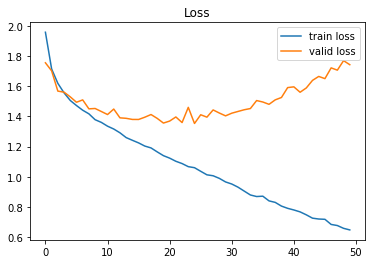

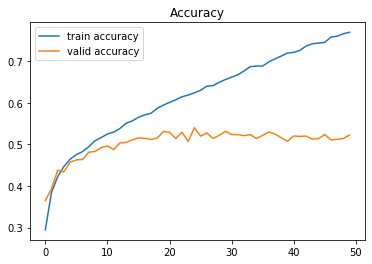

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()